# G2M: Cab Industry
## Week 2
### Halit Ayberk Demir, h.ayberk.demir.34@gmail.com 

## Importing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date, timedelta

In [2]:
df_cab_data = pd.read_csv("Cab_Data.csv", index_col=0)
df_cab_data.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


* In order to interpret with the dates we should change it to gregorian date

In [3]:
first_date = df_cab_data["Date of Travel"].min()
last_date = df_cab_data["Date of Travel"].max()
base_date = date(2016, 1, 31) - timedelta(days=first_date)

df_cab_data["Date of Travel"] = df_cab_data["Date of Travel"].apply(
    lambda x: base_date + timedelta(days=x)
)

### Calculated Columns
* In order to check seasonality later i will add some calculated columns

In [4]:
df_cab_data["Year of Travel"] = df_cab_data["Date of Travel"].apply(
    lambda x: x.year
)
df_cab_data["Month of Travel"] = df_cab_data["Date of Travel"].apply(
    lambda x: x.month
)
def get_quarter(month):
    if month in (1, 2, 3):
        return "Q1"
    elif month in (4, 5, 6):
        return "Q2"
    elif month in (7, 8, 9):
        return "Q3"
    else:
        return "Q4"


df_cab_data["Quarter of Travel"] = df_cab_data["Month of Travel"].apply(get_quarter)
df_cab_data["Date of Travel"] = pd.to_datetime(df_cab_data["Date of Travel"])
df_cab_data["Net Profit"] = df_cab_data["Price Charged"] - df_cab_data["Cost of Trip"]

### Combining DataSets

* I will merge the relational tables in order to get all the information to my "fact" table.

In [5]:
df_trans = pd.read_csv("Transaction_ID.csv", index_col=0)
df_trans.head()

,Customer ID,Payment_Mode
Transaction ID,,
10000011,29290,Card
10000012,27703,Card
10000013,28712,Cash
10000014,28020,Cash
10000015,27182,Card


In [6]:
df_customer = pd.read_csv("Customer_ID.csv", index_col=0)
df_customer.head()

,Gender,Age,Income (USD/Month)
Customer ID,,,
29290,Male,28,10813
27703,Male,27,9237
28712,Male,53,11242
28020,Male,23,23327
27182,Male,33,8536


In [7]:
df_city = pd.read_csv("City.csv")
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [8]:
df_trans_customer = pd.merge(df_trans, df_customer, how="left", left_on="Customer ID", right_index=True)
df_trans_customer

,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,
10000011,29290,Card,Male,28,10813
10000012,27703,Card,Male,27,9237
10000013,28712,Cash,Male,53,11242
10000014,28020,Cash,Male,23,23327
10000015,27182,Card,Male,33,8536
...,...,...,...,...,...
10440104,53286,Cash,Male,32,6528
10440105,52265,Cash,Male,56,7966
10440106,52175,Card,Male,32,6423


* I am using left joins because i dont want to lose data from left tables.

In [9]:
df_cab_trans_customer = pd.merge(df_cab_data, 
                                 df_trans_customer,
                                 how="left",
                                 left_on="Transaction ID",
                                 right_index=True)
df_cab_trans_customer

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Quarter of Travel,Net Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
Transaction ID,,,,,,,,,,,,,,,
10000011,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016,2,Q1,57.3150,29290,Card,Male,28,10813
10000012,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016,2,Q1,23.6660,27703,Card,Male,27,9237
10000013,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016,1,Q1,27.5680,28712,Cash,Male,53,11242
10000014,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016,2,Q1,25.7980,28020,Cash,Male,23,23327
10000015,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016,2,Q1,16.8440,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10440101,2018-02-06,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018,2,Q1,5.8800,52392,Cash,Male,24,15651
10440104,2018-02-02,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018,2,Q1,6.9020,53286,Cash,Male,32,6528
10440105,2018-02-03,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018,2,Q1,87.4200,52265,Cash,Male,56,7966


In [10]:
df_all = pd.merge(df_cab_trans_customer, df_city, on="City", how="left")
df_all.head()

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Quarter of Travel,Net Profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,2016-02-06,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,2,Q1,57.315,29290,Card,Male,28,10813,"814,885","24,701"
1,2016-02-04,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,2,Q1,23.666,27703,Card,Male,27,9237,"814,885","24,701"
2,2016-01-31,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016,1,Q1,27.568,28712,Cash,Male,53,11242,"814,885","24,701"
3,2016-02-05,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016,2,Q1,25.798,28020,Cash,Male,23,23327,"814,885","24,701"
4,2016-02-01,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016,2,Q1,16.844,27182,Card,Male,33,8536,"814,885","24,701"


* Changing the string values with integers.

In [11]:
df_all["Population"] = df_all["Population"].apply(lambda x: int(x.replace(",", "")))
df_all["Users"] = df_all["Users"].apply(lambda x: int(x.replace(",", "")))
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date of Travel      359392 non-null  datetime64[ns]
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   KM Travelled        359392 non-null  float64       
 4   Price Charged       359392 non-null  float64       
 5   Cost of Trip        359392 non-null  float64       
 6   Year of Travel      359392 non-null  int64         
 7   Month of Travel     359392 non-null  int64         
 8   Quarter of Travel   359392 non-null  object        
 9   Net Profit          359392 non-null  float64       
 10  Customer ID         359392 non-null  int64         
 11  Payment_Mode        359392 non-null  object        
 12  Gender              359392 non-null  object        
 13  Age                 359392 no

* Checking if i have any null values in the dataset

In [12]:
df_all.isnull().sum()

Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Year of Travel        0
Month of Travel       0
Quarter of Travel     0
Net Profit            0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

### Describing the whole dataset

* Checking some statistics like mean std and quartiles

In [13]:
df_all.describe()

,KM Travelled,Price Charged,Cost of Trip,Year of Travel,Month of Travel,Net Profit,Customer ID,Age,Income (USD/Month),Population,Users
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,22.567254,423.443311,286.190113,2017.167319,6.986725,137.253198,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,12.233526,274.378911,157.993661,0.860754,3.742463,160.311840,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.900000,15.600000,19.000000,2016.000000,1.000000,-220.060000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,206.437500,151.200000,2016.000000,4.000000,28.012000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,22.440000,386.360000,282.480000,2017.000000,8.000000,81.962000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,32.960000,583.660000,413.683200,2018.000000,10.000000,190.030000,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,2019.000000,12.000000,1463.966000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


##  Univariate Analysis


skewness pink is 1.8655266065212484
skewness yellow is Net Profit    1.669
dtype: float64
mean pink is 62.65217410961977
mean yellow is Net Profit    160.259986
dtype: float64
median pink is 41.5
median yellow is Net Profit    102.0
dtype: float64


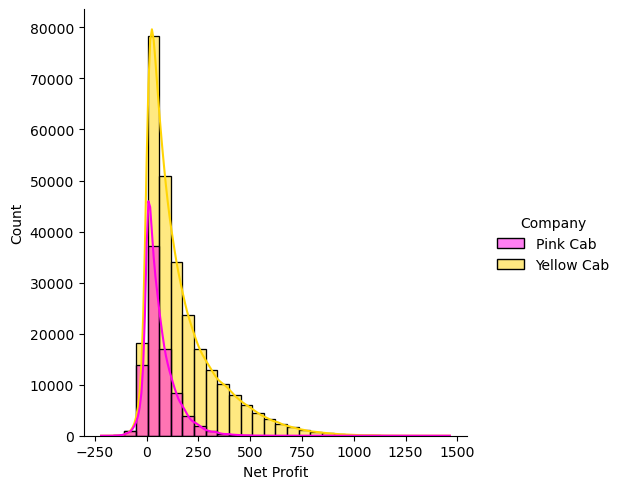

In [14]:
# Defining a function to plot distributions
def plot_dist(column_name, data=df_all, bins=30):
    sns.displot(data=data, x=column_name,hue="Company", bins=bins, kde=True, palette=["#ff00e6", "#ffd505"])
    skew_pink = data.loc[data["Company"] == "Pink Cab", column_name].skew()
    skew_yellow = data.loc[data["Company"] == "Yellow Cab", [column_name]].skew()
    mean_pink = data.loc[data["Company"] == "Pink Cab", column_name].mean()
    mean_yellow = data.loc[data["Company"] == "Yellow Cab", [column_name]].mean()
    median_pink = data.loc[data["Company"] == "Pink Cab", column_name].median()
    median_yellow = data.loc[data["Company"] == "Yellow Cab", [column_name]].median()
    print(f"skewness pink is {skew_pink}")
    print(f"skewness yellow is {skew_yellow}")
    print(f"mean pink is {mean_pink}")
    print(f"mean yellow is {mean_yellow}")
    print(f"median pink is {median_pink}")
    print(f"median yellow is {median_yellow}")
    
    plt.show()
    
plot_dist("Net Profit")

skewness pink is 0.05684113920849101
skewness yellow is KM Travelled    0.055452
dtype: float64
mean pink is 22.559916775861463
mean yellow is KM Travelled    22.569517
dtype: float64
median pink is 22.44
median yellow is KM Travelled    22.44
dtype: float64


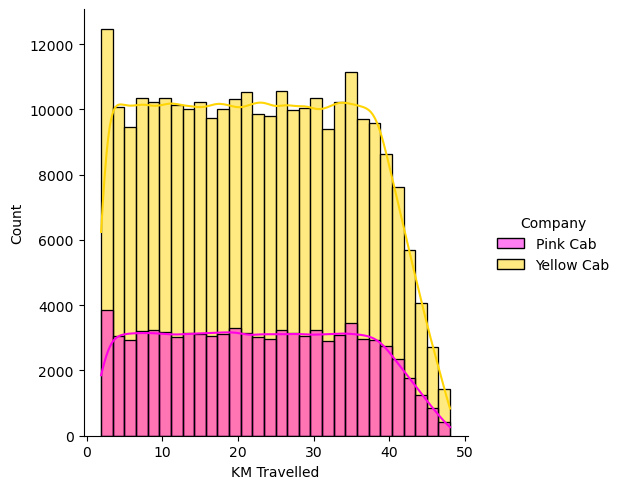

In [15]:
plot_dist("KM Travelled")

skewness pink is 0.688531815875076
skewness yellow is Age    0.684347
dtype: float64
mean pink is 35.322413854162974
mean yellow is Age    35.341112
dtype: float64
median pink is 33.0
median yellow is Age    33.0
dtype: float64


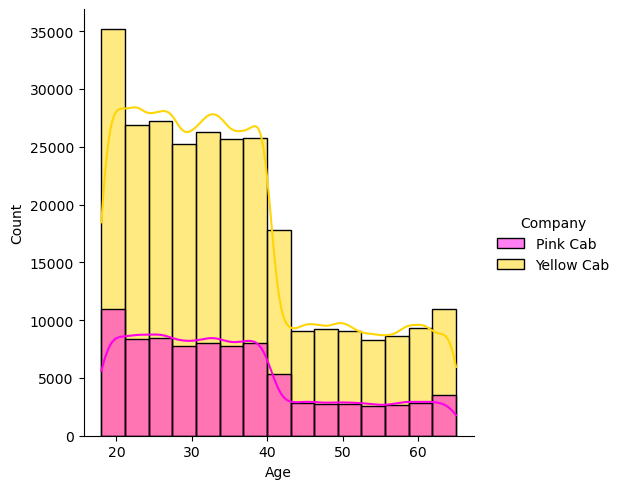

In [16]:
plot_dist("Age", bins=15)
plt.show()

skewness pink is 0.3052111013571613
skewness yellow is Income (USD/Month)    0.310911
dtype: float64
mean pink is 15059.04713673549
mean yellow is Income (USD/Month)    15045.669817
dtype: float64
median pink is 14713.0
median yellow is Income (USD/Month)    14676.0
dtype: float64


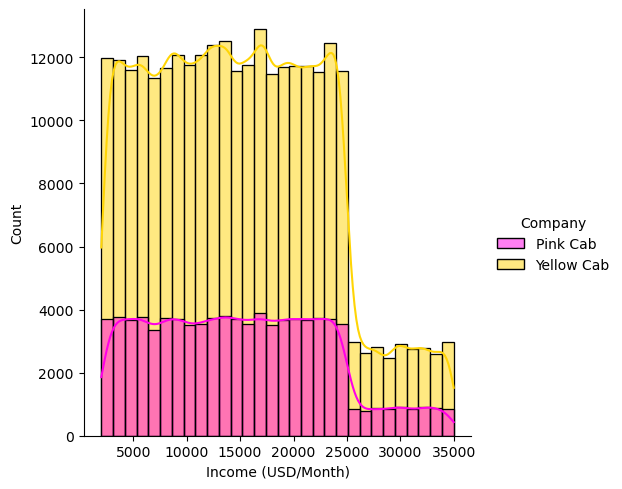

In [17]:
plot_dist("Income (USD/Month)")

## Bi Variate Analysis

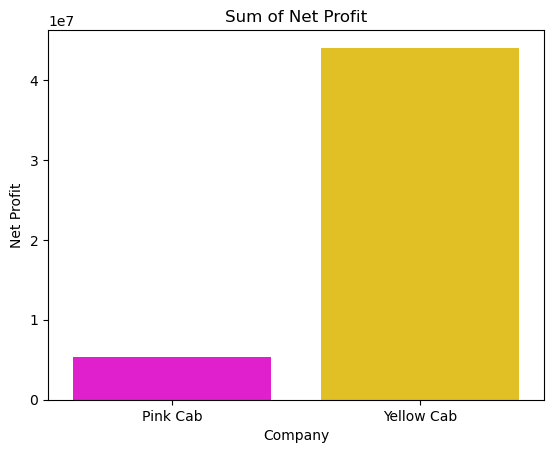

In [18]:
sns.barplot(data=df_all, 
            y="Net Profit",
            x="Company", 
            palette=["#ff00e6", "#ffd505"], 
            estimator="sum", 
            errorbar=None,
            )
plt.title("Sum of Net Profit")
plt.show()

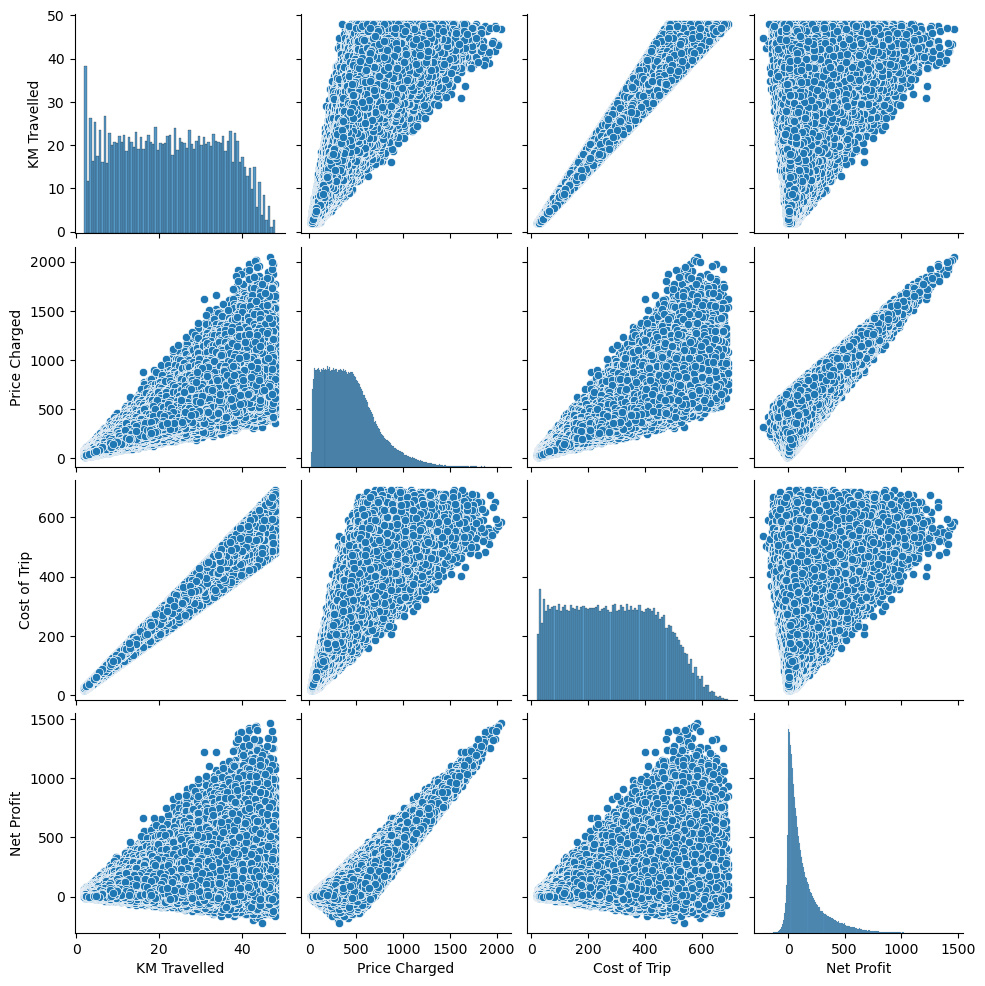

In [19]:
sns.pairplot(data=df_all[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Net Profit']])
plt.show()

### Correlation Matrices

* As we can see from the pairplot some columns has correlation with each other. 
* I will plot correlation matrices for Pink Cab and the Yellow Cab seperately to investigate if correlations between columns differ

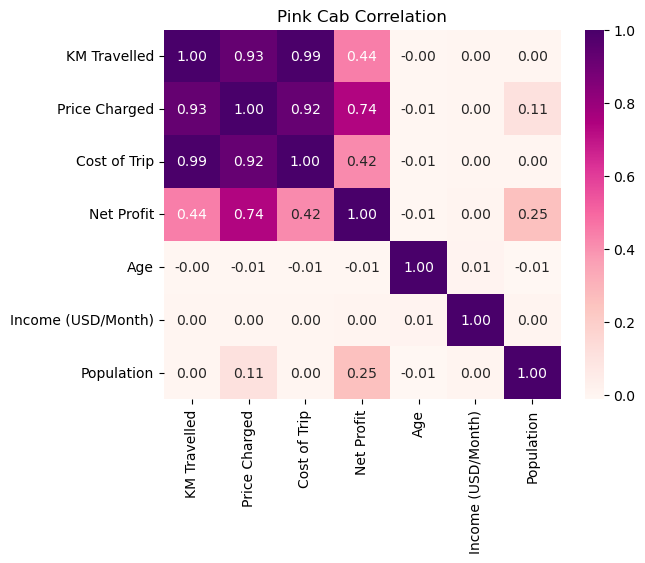

In [20]:

def correlation_matrix(company, data=df_all):
    df_pink = data.query(f"Company == '{company}'")[['KM Travelled',
                                                    'Price Charged',
                                                    'Cost of Trip',
                                                    'Net Profit',
                                                    'Age',
                                                    'Income (USD/Month)',
                                                    'Population']]

    ax = sns.heatmap(df_pink.corr(), 
                    cmap='RdPu', 
                    annot=True, 
                    fmt=".2f")
    plt.title(f"{company} Correlation")
    plt.show()
    
correlation_matrix("Pink Cab")

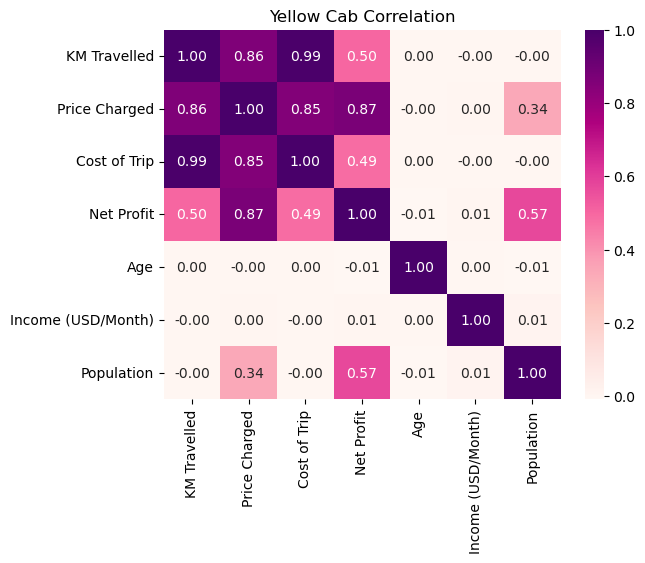

In [21]:
correlation_matrix("Yellow Cab")

* Correlations are nearly similar for pink cab and the yellow cab firm except Population

* Yellow cab firm seems more correletad with the population of the country. I will plot a boxplot to confirm this.

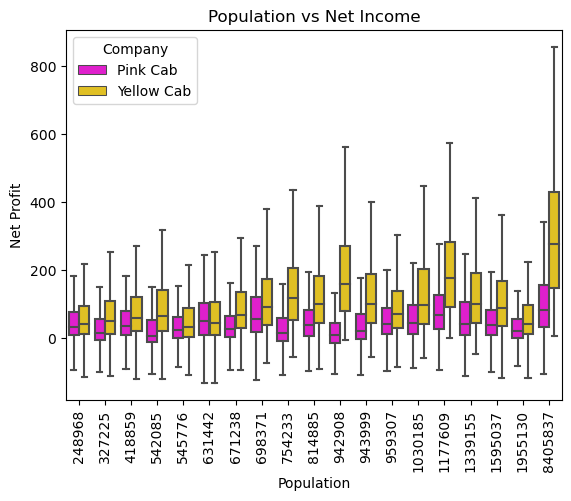

In [22]:
ax = sns.boxplot(data=df_all,
                 x="Population",
                 y="Net Profit",
                 hue="Company",
                 palette=["#ff00e6", "#ffd505"],
                 showfliers=False)
setxlabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Population vs Net Income")
plt.show()

* We can conclude that yellow cab gaining more profit in more populated areas
* Conversely median of the net profit of the pink cab is not changing as much as the yellow cab.

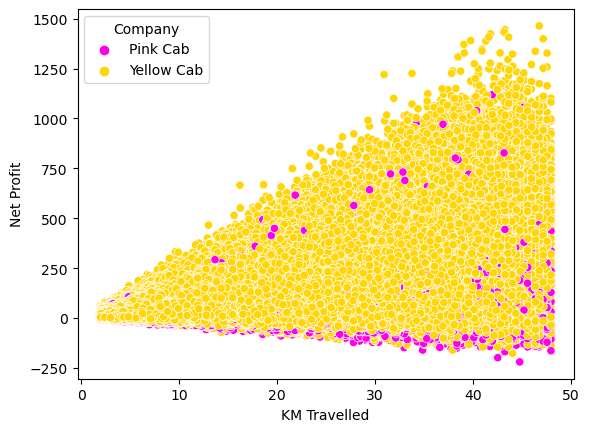

In [23]:
sns.scatterplot(data=df_all,
                x="KM Travelled",
                y="Net Profit",
                hue="Company",
                palette=["#ff00e6", "#ffd505"])
plt.show()

* We can also see that KM travveled has a correlation with the Net profit gained by both companies, since yellow cab has much more travels than the pink cab

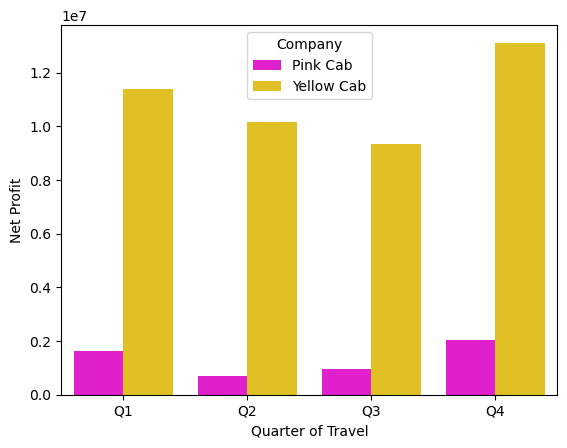

In [24]:
sns.barplot(data=df_all, 
            x="Quarter of Travel", 
            y="Net Profit",
            hue="Company", 
            estimator="sum",
            errorbar=None,
            palette=["#ff00e6", "#ffd505"])

plt.show()

* We can see from this barplot that regardless of the companies they increased in net profit in fourth quarter, this makes sense since fourth quarter is winter and people want to take cabs.

[]

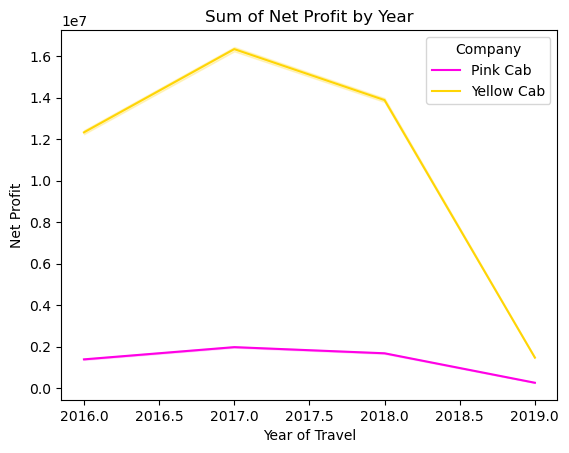

In [25]:
sns.lineplot(data=df_all, 
             x="Year of Travel",
             y="Net Profit",
             hue="Company",
             estimator="sum",
             palette=["#ff00e6", "#ffd505"])
plt.title("Sum of Net Profit by Year")
plt.plot()

* We can see that sum of the profit is always more in the yellow cab regardless of year but yellow cab is showing decreasing trend between 2017 and 2019, 

* Pink Cab is not showing a positive trend either but yellow cab is showing much more negative slope in trend.

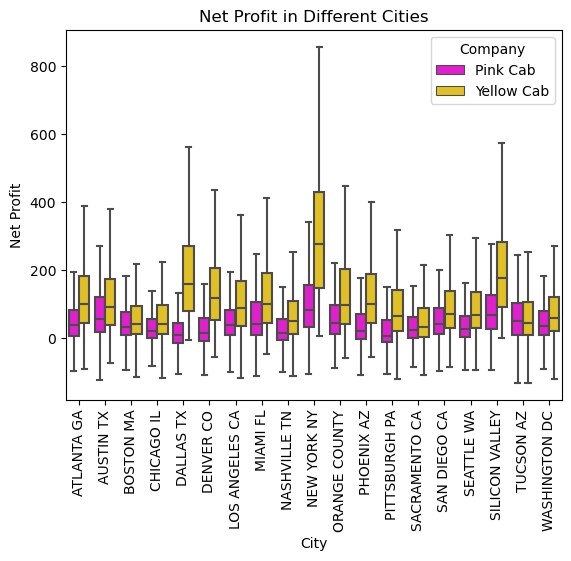

In [26]:
ax = sns.boxplot(data=df_all, 
                 x="City", 
                 y="Net Profit", 
                 hue="Company",
                 showfliers=False,
                 palette=["#ff00e6", "#ffd505"]
                 )
setxlabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Net Profit in Different Cities")
plt.show()

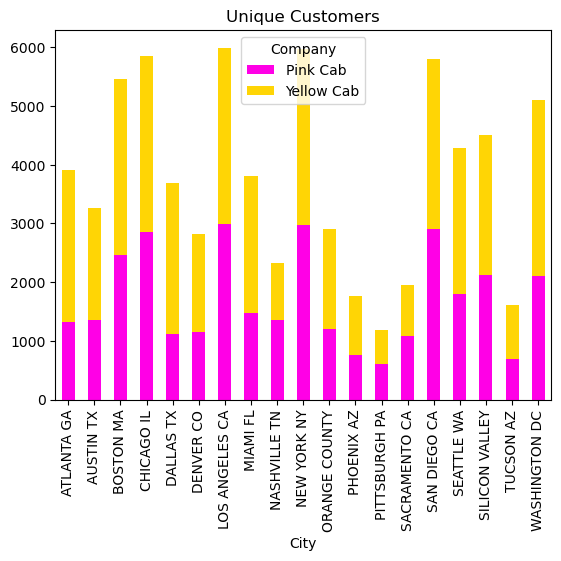

In [27]:
pd.pivot_table(df_all, 
               values="Customer ID",
               index=["City"],
               columns=["Company"],
               aggfunc=lambda x: len(np.unique(x))).plot.bar(stacked=True,
                                                             color=["#ff00e6", "#ffd505"])
plt.title("Unique Customers")
plt.show()

* An interesting graph, even though yellow cab has much more net profit than the pink cab their reach for unique customers are nearly the same.

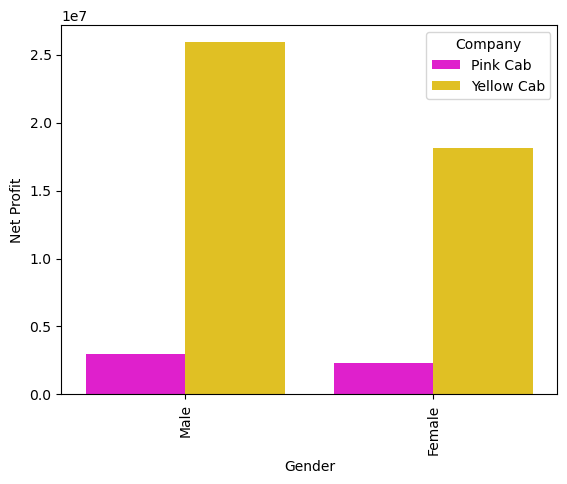

In [28]:
ax = sns.barplot(data=df_all, 
                 x="Gender", 
                 y="Net Profit", 
                 hue="Company",
                 estimator="sum",
                 errorbar=None,
                 palette=["#ff00e6", "#ffd505"])
setxlabels = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

* Both cab firms seems to have more male customers than females.

# Hypothesis Testing
## Hypothesis 1
* Hypothesis -> Net profit of yellow cab company is higher than the pink cab

* Null Hypothesis -> Net profit of the pink cab company higher or equal to yellow cab company

> Level of significance is set to 0.05 in this hypothesis testing experiments.
> We should use one tail test since the hypothesis is mean_1 > mean_2.

In [29]:
import scipy.stats as stats

df_pink_net_profit = df_all.query("Company == 'Pink Cab'")["Net Profit"].values
df_yellow_net_profit = df_all.query("Company == 'Yellow Cab'")["Net Profit"].values


def get_test_statistic(data_1, data_2):
    mean_1 = data_1.mean()
    mean_2 = data_2.mean()
    std_1 = data_1.std()
    std_2 = data_2.std()
    
    standard_error = ((std_1 ** 2 / len(data_1)) + (std_2 ** 2 / len(data_2))) ** (1 / 2)
    
    test_statistic = (mean_1 - mean_2) / standard_error
    test_statistic = test_statistic / 2 # since it is a one tail test
    
    return stats.norm.sf(test_statistic)
    


p = get_test_statistic(df_yellow_net_profit, df_pink_net_profit)

print(f"since p is {p} we strongly reject the null hypothesis")

since p is 0.0 we strongly reject the null hypothesis


## Hypothesis 2 
* Yellow Cab has richer customers than pink cab

* Null Hypothesis yellow cab has more poor customers than the pink cab.

> We should use one tail test since the hypothesis is mean_1 > mean_2.

In [30]:
df_pink_income = df_all.query("Company == 'Pink Cab'")["Income (USD/Month)"].values
df_yellow_income = df_all.query("Company == 'Yellow Cab'")["Income (USD/Month)"].values
p = get_test_statistic(df_yellow_income, df_pink_income) # One tailed
print(f"Since p is {p:.5f} much higher than 0.05 we fail to reject null hypothesis ")

Since p is 0.58440 much higher than 0.05 we fail to reject null hypothesis 


## Hypothesis 3

* Net profit is dependent on the distance travelled

* Null hypothesis  -> There is no dependency between the KM travelled and the Net Profit

> Since it is correlation test we will use pearson

In [31]:
from scipy.stats import pearsonr

stat, p = pearsonr(df_all["KM Travelled"], df_all["Net Profit"]) 
print(f"has a correlation of {stat}")
print(f"They are dependent values since p is {p}") 

has a correlation of 0.4627681978971103
They are dependent values since p is 0.0


## Hypothesis 4

* Age and the distance travelled are dependent values

* Null hypothesis -> Age and distance travelled are independent
> Since it is correlation test we will use pearson

In [32]:
from scipy.stats import pearsonr

stat, p = pearsonr(df_all["KM Travelled"], df_all["Age"]) 
print(f"has a correlation of {stat:.2f}")
print(f"Fail to reject null hypothesis since p =  {p:.2f}") 

has a correlation of -0.00
Fail to reject null hypothesis since p =  0.83


## Hypothesis 5

* Net Profit and Income of the customers are dependent.

* Null hypothesis -> Net Profit and Income are no related
> Since it is correlation test we will use pearson

In [33]:
from scipy.stats import pearsonr

stat, p = pearsonr(df_all["Net Profit"], df_all["Income (USD/Month)"])  
print(f"has a correlation of {stat}")
print(f"Income and Net profit gained by the company is probably dependent since p =  {p:.5f}") 

has a correlation of 0.006148297768292579
Income and Net profit gained by the company is probably dependent since p =  0.00023


## Hypothesis 6

* Distance travelled by the cabs changes as Population of the city changes

* Null hypothesis -> Distance travelled and population of the city are not dependent on each other
> Since it is correlation test we will use pearson

In [34]:
from scipy.stats import pearsonr

stat, p = pearsonr(df_all["KM Travelled"], df_all["Population"])  
print(f"has a correlation of {stat:.2f}")
print(f"Distance Travelled and population of the city are probably independent values since  p =  {p:.2f} > 0.05") 

has a correlation of -0.00
Distance Travelled and population of the city are probably independent values since  p =  0.17 > 0.05


## Hypothesis 7

* Net profits differ between quarters, seasons.

* Null Hypothesis -> There is no difference in Net Profits between quarters

> Since it is 4 values we should compare them using ANOVA

In [ ]:
from scipy.stats import f_oneway

Q1 = df_all.loc[df_all["Quarter of Travel"] == "Q1", "Net Profit"]
Q2 = df_all.loc[df_all["Quarter of Travel"] == "Q2", "Net Profit"]
Q3 = df_all.loc[df_all["Quarter of Travel"] == "Q3", "Net Profit"]
Q4 = df_all.loc[df_all["Quarter of Travel"] == "Q4", "Net Profit"]

stat, p = f_oneway(Q1, Q2, Q3, Q4)

print(f"Since p value is {p}, they are probably different distrubitions and our data has  seasonality")
print(f"We saw in the seasonality graph that at 4th quarter usage of cabs are increasing due to winter")




# Conclusion

* Even though Yellow Cab shows a negative trend in years, their average net profit is much more higher , as we've seen in the hypothesis test, in addition pink cab is not showing a positive trend either. Also we have Seasonality in the data as we've seen in the hypothesis testing and visualizing section.